# Lab 05: Pandas Data Analysis Library

## Due Friday 6/15 at midnight

In this lab/discussion, we will start to learn about the Pandas library for data analysis. Pandas is part of the Anaconda distribution, and there are decent tutorials on most aspects of Pandas; I would recommend the following:

Panda Tutorial: http://pandas.pydata.org/pandas-docs/stable/tutorials.html

Basic functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html

Indexing and selecting data: http://pandas.pydata.org/pandas-docs/stable/indexing.html

There are three problems, the first an extended tutorial, and the last two actual problems. You should read through problem 0 carefully, perhaps with a partner, and try all the examples. Problems 1 and 2 are actual activities based on the material in problem 0, you should do these yourself to hand in with the homework.

In [1]:
# Here are some imports which will be used in code that we write for CS 237

# Jupyter notebook specific 

from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML   

# Imports potentially used for this lab

import numpy as np                # arrays and functions which operate on array
from numpy import linspace, arange
import matplotlib.pyplot as plt   # normal plotting
import seaborn as sns             # Fancy plotting 
import pandas as pd               # Data input and manipulation

from numpy.random import random, randint, uniform, choice, shuffle
from collections import Counter

%matplotlib inline

## Problem Zero: Basic Pandas data manipulation

We will first learn how to read data sets from a text or CSV ("Comma Separated Values") file, understand the DataFrame data structure, and learn how to extract data from a dataframe; then we will understand how to select rows and columns from a table, and to apply various functions to tables; finally, we will learn how to display histograms of the data. There is a LOT of complexity in all these various aspects of Pandas, but we will learn a "novice subset" of the most important features.

Note: There is a lot of reading and thinking to do in this first problem; when we want you to do something on your own computer, we will indicate it with a **TODO**. There will be nothing to hand in for this problem, but **PLEASE DO NOT SKIP ANY OF THIS**!

### Data as Tables

The basic form of the data sets manipulated in Pandas (and indeed in all modern database systems) is a 2D table of data with rows and columns; for example, here is a data set we will use as an example:

| Userid   | Gender | ClassYear | GPA  | Credits | Transfer | AP |
|----------|--------|-----------|------|---------|----------|----|
| sanders  | M      | U2        | 4.00 | 33      | 0        | 12 |
| clinton  | F      | U4        | 3.63 | 45      | 71.1     | 8  |
| carson   | M      | U4        | 3.38 | 113     | 0        | 12 |
| fiorina  | F      | U2        | 2.21 | 28      | 0        | 0  |
| christie | M      | U2        | 3.81 | 33      | 0        | 4  |
| cruz     | M      | U3        | 3.04 | 56      | 28       | 0  |
| huckabee | M      | U4        | 3.20 | 80      | 44       | 24 |
| trump    | M      | U4        | 2.58 | 66      | 30       | 0  |
| bush     | M      | U3        | 2.84 | 64      | 0        | 0  |
| rubio    | M      | U4        | 3.92 | 106     | 3        | 24 |

This is a hypothetical list of 10 students at BU; each row is an individual student, and each column gives a specific piece of information about that student. Note that each column contains the same kind of data (i.e., the first three columns have strings, and the remaining are floats--we will assume that all numberic data is represented as floating-point), and each column has a header giving a description of the information in that column. Column headers are not absolutely necessary, but we will make this assumption for now.

**Note on terminology**: In Pandas, a table is called a dataframe; in databases we often call the rows in a table records, the columns are called fields, and the headers are then called field names. This terminology is sometimes used in data analysis.

### Comma Separated Value (CSV) Files

A common file format for data stored as text is a CSV file, in which each row is stored on a separate line, with commas between all the fields. The table above would look like this if I opened it with TextEdit on my Mac (there would be a newline \n at the end of each line; on a Windows machine there would be \r\n):

![](textfile.png)

This is a file format supported by Excel as well, and you can import it into an Excel spreadsheet or save a spreadsheet as a CSV file:

![](excel.png)

If you want to create such a file, the easiest way is probably to start with an Excel spreadsheet and simply save it in .csv format!

### Reading and Writing CSV Files in Pandas

To manipulate such data tables in Python, the best library is Pandas, which you should import as follows:

In [2]:
import pandas as pd       # this was also included in the first code cell above

The function *read_csv* takes a filename (which can  be a local file or a complete pathname) and reads the csv file into a Pandas data frame. 

Here is an example of reading the csv file students.csv into a Pandas dataframe, which I call *stud*; if you ask for the value of the dataframe to be printed out, it will add sequential index numbers to each row:

In [3]:
stud = pd.read_csv('students.csv')

"""
Alternately, you could use a full path name, starting with the directory, here is mine:

labDirectory = '/Users/Jiatonghao/Desktop/cs237/lab05/'
stud = pd.read_csv(labDirectory + 'students.csv')

"""

print(stud)

     Userid Gender ClassYear   GPA  Credits  Transfer  AP
0   sanders      M        U2  4.00       33       0.0  12
1   clinton      F        U4  3.63       45      71.1   8
2    carson      M        U4  3.38      113       0.0  12
3   fiorina      F        U2  2.21       28       0.0   0
4  christie      F        U2  3.81       33       0.0   4
5      cruz      M        U3  3.04       56      28.0   0
6  huckabee      M        U4  3.20       80      44.0  24
7     trump      M        U4  2.58       66      30.0   0
8      bush      M        U3  2.84       64       0.0   0
9     rubio      M        U4  3.92      106       3.0  24


Although we won't need to do this right now, for reference, you can also write out a dataframe to a csv file; the default is to write out the index numbers on each row--in general you want to avoid this. The following command will create an identical file to the one read in, without the pesky index numbers:

In [4]:
stud.to_csv('temp.csv', encoding='utf-8', index=False)

### TODO 

The data file has been included in the zip file for this lab. Try out the code just shown and open up the file temp.csv which you wrote out to verify that this all works as expected.

### Selecting Rows and Columns from the Dataframe using Slices

Pandas gives you a truly bewildering variety of ways to manipulate dataframes, but first we will only need to think about the basics: selecting rows and columns from the table. This amounts to either selecting rows from the table, or selecting columns from the table (or both).

The basic ideas here are that we think of the dataframe as a two-dimensional list, where the rows are indexed by numbers and the columns are indexed by column headers, so that

*rows are selecting by using array slices, e.g., [0:3]*

and

*columns are selecting by using a list of column headers, e.g., [ ['Userid','GPA'] ]*

The double brackets are not a typo! The outer brackets enclose the parameter, which is a list of header names. If there is only a single header name, then you can use a single set of brackets.

### TODO

For the following, first try to predict what will happen, and then try it to confirm your understanding:

- stud[0:3]
- stud[5:]
- stud[:]
- stud[1:7:2]
- stud[::-1]

In [5]:
print(stud[0:3])

    Userid Gender ClassYear   GPA  Credits  Transfer  AP
0  sanders      M        U2  4.00       33       0.0  12
1  clinton      F        U4  3.63       45      71.1   8
2   carson      M        U4  3.38      113       0.0  12


In [6]:
print(stud["Userid"].head(n=5))

0     sanders
1     clinton
2      carson
3     fiorina
4    christie
Name: Userid, dtype: object


So the point here is that selecting rows is really the same as slicing a list.

### TODO

For the following, first try to predict what will happen, and then try it to confirm your understanding:
- stud[ ['Userid', 'GPA'] ]
- stud[ ['GPA', 'Gender'] ]
- stud[ ['Credits'] ]
- stud['Credits']
- stud[ ['GPA', 'Userid', 'GPA'] ]

In [7]:
print(stud[['Userid', 'GPA']].head(3))

    Userid   GPA
0  sanders  4.00
1  clinton  3.63
2   carson  3.38


So, selecting columns is done by giving a list of column headers; just remember the double brackets when you have more than one header.

You can also combine these two, to get a slice of rows and a selection of columns.

### TODO

For the following, first try to predict what will happen, and then try it to confirm your understanding:
- stud[0:3][['GPA','Userid']]
- stud[::-1][['AP','Gender','Credits']]
- stud['GPA'][2:7]
- stud[2:7][['GPA']]


In [8]:
print(stud[2:7][['GPA']])

    GPA
2  3.38
3  2.21
4  3.81
5  3.04
6  3.20


Note carefully the last two examples: it does not matter what order you put the selectors in.

Finally, you would expect that you could do a slice on column names; try this:

- stud[ ['GPA' : 'AP'] ] # error!

Nope! In order to do this, you need to use the loc function, and give it two slices separated by a comma.

### TODO

For the following, first try to predict what will happen, and then try it to confirm your understanding:

- stud.loc[ 0:3 , 'GPA':'AP' ]
- stud.loc[:, 'Userid':'GPA']
- stud.loc[2:8, 'GPA':'Userid']
- stud.loc[:5, 'ClassYear': ]
- stud.loc[2:7, 'Userid':'Transfer':2]
- stud.loc[::-1, ::-1]


In [9]:
print(stud.loc[0:3, 'GPA':'AP'])

    GPA  Credits  Transfer  AP
0  4.00       33       0.0  12
1  3.63       45      71.1   8
2  3.38      113       0.0  12
3  2.21       28       0.0   0


### Selecting Rows and Columns from the Dataframe using Boolean Expressions

Pandas gives you lots of ways of selecting data, and a particularly useful way of selecting rows is to specify a boolean expression that the row values must satisfy. For example, to select only those rows representing men, we could do this:

In [10]:
men = stud[stud['Gender'] == 'M']
print(men)

     Userid Gender ClassYear   GPA  Credits  Transfer  AP
0   sanders      M        U2  4.00       33       0.0  12
2    carson      M        U4  3.38      113       0.0  12
5      cruz      M        U3  3.04       56      28.0   0
6  huckabee      M        U4  3.20       80      44.0  24
7     trump      M        U4  2.58       66      30.0   0
8      bush      M        U3  2.84       64       0.0   0
9     rubio      M        U4  3.92      106       3.0  24


and here we select the rows where the Credits are less than the Transfer:

In [11]:
lessCredits = stud[stud['Credits'] < stud['Transfer']]
print(lessCredits)

    Userid Gender ClassYear   GPA  Credits  Transfer  AP
1  clinton      F        U4  3.63       45      71.1   8


### TODO

For the following, first try to predict what will happen, and then try it to confirm your understanding:
- stud[ stud['Userid'] >= 'cruz' ]
- stud[ stud['AP'] == 0 ]
- stud[ stud['GPA'] < 3.5 ]

In [12]:
print(stud[stud["GPA"] > 3.5])

     Userid Gender ClassYear   GPA  Credits  Transfer  AP
0   sanders      M        U2  4.00       33       0.0  12
1   clinton      F        U4  3.63       45      71.1   8
4  christie      F        U2  3.81       33       0.0   4
9     rubio      M        U4  3.92      106       3.0  24


To do compound boolean expressions when selecting rows, you have to enclose the expressions in parentheses and use the "bitwise" boolean operations ~, &, | (instead of the normal Python not, and, or); here is an example:

In [13]:
menGPA = stud[(stud['Gender'] == 'M')&(stud['GPA'] < 3.5 )]
print(menGPA)

     Userid Gender ClassYear   GPA  Credits  Transfer  AP
2    carson      M        U4  3.38      113       0.0  12
5      cruz      M        U3  3.04       56      28.0   0
6  huckabee      M        U4  3.20       80      44.0  24
7     trump      M        U4  2.58       66      30.0   0
8      bush      M        U3  2.84       64       0.0   0


### Printing out a Table from a Python Program

If you are using the console interatively, of course the results of the expressions you type in are automatically displayed. How do you do this in a Python program? Easy:

In [14]:
print(str( stud[ stud['GPA'] < 3.5 ] ) )

     Userid Gender ClassYear   GPA  Credits  Transfer  AP
2    carson      M        U4  3.38      113       0.0  12
3   fiorina      F        U2  2.21       28       0.0   0
5      cruz      M        U3  3.04       56      28.0   0
6  huckabee      M        U4  3.20       80      44.0  24
7     trump      M        U4  2.58       66      30.0   0
8      bush      M        U3  2.84       64       0.0   0


### Extracting a List from a Pandas Data Frame

Sometimes you simply want to grab one particular column (say the GPA) into a list, so that you
can manipulate it in Python. This is easy, as you just have to convert a single-column frame into a list:

In [15]:
G = list(stud['GPA'])
print(G)

[4.0, 3.63, 3.38, 2.21, 3.81, 3.04, 3.2, 2.58, 2.84, 3.92]


### Saving your work to a file

Note that each of these expressions we have explored returns a new dataframe, so that if you wanted to create a new data set derived from an existing set, you could assign an expression to a variable and write it out, e.g.,

In [16]:
studrev = stud.loc[::-1, ::-1]
studrev.to_csv("studentrev.csv", index=False)

or just combine without bothering with the variable:

In [17]:
stud.loc[::-1, ::-1].to_csv("studentrev.csv", index=False)

Both of these would put the file studentrev.csv into the current directory, which I could then import into Excel

### Functions on DataFrames

Having read in a dataframe, or created a new one using one of the expressions just shown, we can use a variety of functions to explore and organize the data. Most of these are very intuitive, so we will mostly try a bunch of examples, you can easily explore these in the link Basic Fuctionality: http://pandas.pydata.org/pandas-docs/stable/basics.html

### TODO

For the following, which sort the dataframe, first try to predict what will happen, and then try it to confirm your understanding:

- stud.sort_values('Userid')
- stud.sort_values('Userid', ascending=False)
- stud.sort_values( ['Gender', 'Userid'] )
- stud.sort_values( ['Gender', 'Userid'], ascending=[False,True] )

In [18]:
print(stud.sort_values('Userid'))

     Userid Gender ClassYear   GPA  Credits  Transfer  AP
8      bush      M        U3  2.84       64       0.0   0
2    carson      M        U4  3.38      113       0.0  12
4  christie      F        U2  3.81       33       0.0   4
1   clinton      F        U4  3.63       45      71.1   8
5      cruz      M        U3  3.04       56      28.0   0
3   fiorina      F        U2  2.21       28       0.0   0
6  huckabee      M        U4  3.20       80      44.0  24
9     rubio      M        U4  3.92      106       3.0  24
0   sanders      M        U2  4.00       33       0.0  12
7     trump      M        U4  2.58       66      30.0   0


In [19]:
print(stud.sort_values((['Gender', 'Userid'])))

     Userid Gender ClassYear   GPA  Credits  Transfer  AP
4  christie      F        U2  3.81       33       0.0   4
1   clinton      F        U4  3.63       45      71.1   8
3   fiorina      F        U2  2.21       28       0.0   0
8      bush      M        U3  2.84       64       0.0   0
2    carson      M        U4  3.38      113       0.0  12
5      cruz      M        U3  3.04       56      28.0   0
6  huckabee      M        U4  3.20       80      44.0  24
9     rubio      M        U4  3.92      106       3.0  24
0   sanders      M        U2  4.00       33       0.0  12
7     trump      M        U4  2.58       66      30.0   0


There are also many statistical functions which operate mostly on individual columns:

### TODO

Let us assume that we have created a new dataframe

*st = stud['GPA']*

First try to predict what will happen, and then try it to confirm your understanding.

- st.max()
- st.min()
- st.median()
- stud['Gender'].mode() # the mode is the most frequent value in the list
- stud['Credits'].sum()
- st.count() * 2 + st.max() # weird, just to show that values can be used any way you want!
- stud[ ['GPA','Credits']].max() # ok, another weird one, it returns the max in each column!

In [20]:
st = stud

### Displaying Distributions from DataFrames

A final function that we should look at is the hist(...) function, which will (as you might expect), produce a graphical display of the histogram for a column of values. It is precisely the same function that we studied in the last lab, except that it takes as its values the data in the column(s) of the dataframe. If you give it a whole dataframe, it will give you histograms of all the numeric columns:

In [21]:
print(st['GPA'].head(2))
print(st['Credits'].max())

0    4.00
1    3.63
Name: GPA, dtype: float64
113


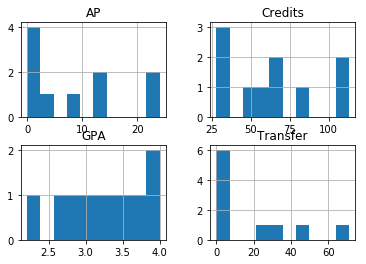

In [22]:
import matplotlib.pyplot as plt 

stud.hist()
plt.show()

It is usually more useful to consider a single column at a time:

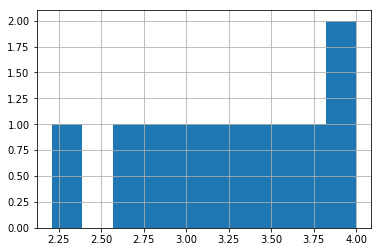

In [23]:
stud['GPA'].hist()
plt.show()

Or you could simply extract the data as a list and then use our usual algorithm for displaying it as a bar chart; note that this works for numeric data (for non-numeric, better to use the method shown above). 

['M', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M']
[1, 0, 1, 0, 0, 1, 1, 1, 1, 1]
Counter({1: 7, 0: 3})
[0, 1]
[3, 7]


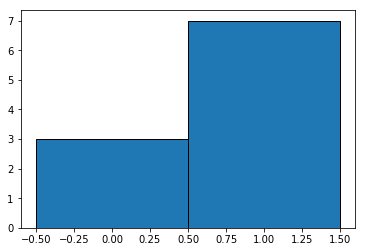

In [24]:
# or can use a bar chart if convert x axis into numbers.....
G = list(stud['Gender'])
print(G)
S = [ 1 if G[i] == 'M' else 0 for i in range(len(G))]
print(S)
D = Counter(S)           
K = list(D.keys())       
K.sort()                 
F = [D[k] for k in K]    
print(D)
print(K)
print(F)

plt.bar( K, F,width=1.0,edgecolor='k')
plt.show()

## Problem One

Download the following file of student data: studentdata.csv and write a function Prob01() which does the following:

- Print out the mean GPA for men;
- Print out the mean GPA for seniors (U4);
- Print out the 10 individuals with the largest number of credits earned, sorted in descending order by GPA;
- Display a histogram of the GPA of all individuals, with bins for each letter grade, i.e., 0.0, 1.0, 2.0, 2.33, 2.67, 3.0, 3.33, 3.67, and 4.0.

  Gender ClassYear   GPA  CreditsEarned  TransferCredits  APCredits
0      F        U2  4.00           33.0              0.0       12.0
1      F        U4  3.63           45.0             71.1        8.0
2      M        U4  3.38          113.0              0.0       12.0
3.1148107163657563
3.195964373464377
     Gender ClassYear   GPA  CreditsEarned  TransferCredits  APCredits
2929      F        U4  3.65          159.5              0.0        0.0
1287      M        U4  3.63          155.0              0.0        0.0
3499      M        U4  3.37          173.0              0.0        0.0
333       F        U4  3.32          154.0              0.0        0.0
396       M        U4  3.12          167.0              0.0        0.0
1374      M        U4  3.10          152.0              0.0        0.0
3876      F        U4  2.89          152.0              0.0        0.0
4070      M        U4  2.87          152.0              0.0        0.0
478       M        U4  2.64          162.0          

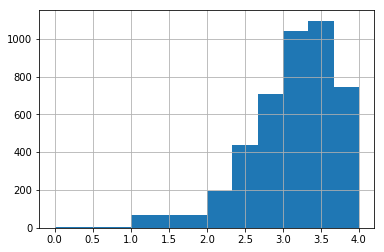

In [25]:
# round4(x): round to 4 decimal places
# use round4(x) to display the numerical outcomes: mean, max, min, etc.
def round4(x):
    return round(x+0.00000000001,4) 

df1 = pd.read_csv('studentdata.csv')
print(df1.head(3))
print(df1[df1['Gender'] == 'M']['GPA'].mean())
print(df1[df1['ClassYear'] == 'U4']['GPA'].mean())
print(df1.sort_values('CreditsEarned', ascending=False).head(10).sort_values('GPA', ascending=False))

df1_gpa = df1['GPA']
df1_gpa_bins = [0.0, 1.0, 2.0, 2.33, 2.67, 3.0, 3.33, 3.67, 4.0]
df1_gpa.hist(bins=df1_gpa_bins)
plt.show()
plt.close()

## Problem Two

Download the following file of heights and weights of 25,000 individuals: biometricdata.csv and write a function Prob02() which does the following:

- Print out the maximum, minimum, mean, and (unbiased) standard deviation (all functions listed above) for the heights of all individuals;
- Print out the mean height for all individuals weighing more than 130 pounds;
- Print out how many individuals have a height >= 65 inches and <= 70 inches;
- Display a histogram of the heights of all individuals from the minimum to the maximum, where each bin represents 1 inch.


When doing your histograms, change the figure size so that they are large enough to see:
<pre>
import matplotlib.pyplot as plt             # assuming you called the library plt

.....

plt.figure(figsize=(10,5))                  #  this will change size of figure when you call hist(....)

Students.hist(.....)
</pre>
Play around with the parameters 10 and 5 until you like the result.

Also, I found that when I called hist(...) several times, Pandas would add the new histogram to the old one (in weird colors). To keep them separate, you need to show a histogram and then close it; after a class to hist(....), add these two lines:

Students['GPA'].hist(.....)    
plt.show()     
plt.close()

HEIGHT:
Max: 75.1528
Min: 60.27836
Standard Deviation: 1.901678771205604
Mean height for individuals > 130lbs: 68.91428710879264
# of Individuals w/ a height >= 65 inches and <= 70 inches: 19846


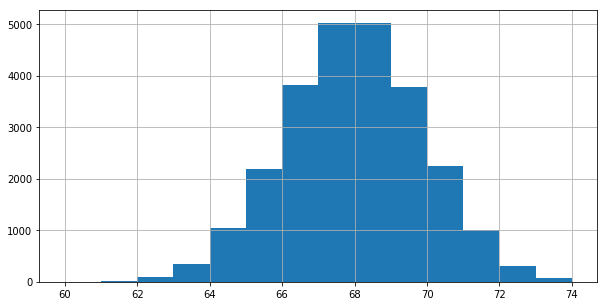

In [26]:
df2 = pd.read_csv('biometricdata.csv')
print("HEIGHT:")
print("Max: " + str(df2['Height'].max()))
print("Min: " + str(df2['Height'].min()))
print("Standard Deviation: " + str(df2['Height'].std()))
print("Mean height for individuals > 130lbs: " + str(df2[df2['Weight'] > 130]['Height'].mean()))
x = df2[df2['Height'] >= 65]
x = x[x['Height'] <= 70]
print("# of Individuals w/ a height >= 65 inches and <= 70 inches: " + str(len(x)))                                            
df2['Height'].hist(figsize=(10, 5), bins=(range(int(df2['Height'].min()), int(df2['Height'].max()))))
plt.show()
plt.close()